# Import necessary libraries

In [43]:
import pandas as pd
import numpy as np
import torch
import string
import re
import matplotlib.pyplot as plt
from scipy.spatial.distance import cosine

from transformers import BertTokenizer, BertModel
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased', output_hidden_states=True)
model.eval()

from sentence_transformers import SentenceTransformer
s_model = SentenceTransformer('bert-base-nli-stsb-mean-tokens')

# Load survey data

In [2]:
# Read it in
path = "../data/surveys_clean.csv"
df = pd.read_csv(path, na_filter=False)

# Drop unnecessary columns
df.drop(columns=['ind_id', 'subject_id', 'image_name', 'image_name_2', 'index'], inplace=True)

# Filter by topic

## Simple keyword search

In [3]:
keywords = [
    "negro",
    "negros",
    "negrohis",
    "color",
    "colors",
    "colored",
    "colerd",
    "coller",
    "black",
    "blacks",
    "blackman",
    "white",
    "whites",
    "race",
    "races",
    "racial"
]

In [4]:
df['about_race'] = 0
for i in range(len(df['long'])):
    for k in keywords:
        if k in df['long'][i].lower().translate(str.maketrans('','',string.punctuation)).split():
            df.at[i, 'about_race'] = 1
            break

In [5]:
for r in df['long'].loc[df['about_race'] > 0]:
    print(r,"\n")

negro have been told many times they're fighting this war so that they may have democracy and the same rights and privileges as whites. but a colored soldier is more discriminated against and segregated than he was when he was a civilian. its evident to those who care to see it that not many of the promises to negro are being kept. since the emancipation proclamation negro have been fighting for what they have now. each right, each privilege was fought for. whatever conclusions may be drawn from this survey lets hope its for the further advantage of the negro. negro love america and will fight for america but the negro are going to demand a status as a citizen equal to that of a white citizen. only that way can an example of democracy be used for other countries. 

i dont like the army. i had rather be on the out side i dont think i have any thing to fight for. the white have all of the privedlages and they should do the fighting 

i think that if were going to win this war, the white 


this camp in the west where i am are all colored soldiers and where i got all my training. i am proud of this camp, but i think all soldiers should get training with all americans regardless of race, but it is white commissioned officers here and colored too. they are very cooperative although they have separate clubs, although on the field they works as one unit, and gets the job done. i had nothing to do with their promotions, but seemingly there ranks dont come up together getting the same work done. its not but few in this all colored division as company commander if any in any of our fighting organization. i has very little company with white soldiers, but when off on pass i be with some they are alright with me. 

i feel that this war should make things better for the negro race for we are to do our part and give our likes to defend our country and by that we should not after be treated as a slave after the war is over. of course we should not look for more than we due but we sh

there are too many rotten and dirty white folks in the army. if we were nearer home we would feel better. 

we have a very fine cap't, and both of our lieutentants {} are swell. i would follow them around the world, and all the men feel the same way but that is all - when you leave them "hell" starts - but i come in the army to make good, and it will take more than another "non-comm" to change that other than that i have no "gripe" to offer. i'm serious i really like army life i'm crazy about this squadron - but some people won't deal fair with those who are under them - that is the only reason i ever feel down heated or disagreeable, it's not the army it's a few individuals with a little authority - i'm sure if you took a survey of all the men here, and they spoke what was in there {} hearts, - it would be the same as i've mentioned above - our captain and two lieutentants {} are white but i love them all. they give us no trouble at all. it's from our own "non-coms" - there are swell 

if the white man doesn't soon open his eyes and see things as they really are, this war will end with the enemy winning. the officers we have around here seem to like the "uncle tom" type of negro. i know for my self if they send me on the battle field with some of the leaders they have picked so far, they may as well start all over again. as far as being an officer in the army i would like very much to become a darn good one. but for some reason they tell me i cannot because i have no leadership ability. this is the case with most of the soldiers in this outfit they aren't allowed a chance to show what they can do. if you don't curse loud and tell the white man the things the negro soldier does when he goes to town you will remain a private the whole time you are in the army. i say wake up white men of america 

i think this questionnaire should  unusual attention, because those kinds of questions enable's whoever reads them to find out just how the negro are being treated. in my opin


i think that is a negro soldier cant go where he wants to go, for where he wants  to sit where he wants to sit, he should have the same  toward the war as a white soldier 

they should be tretied just are like because the in the no diffice in them i will not us all to be done just a like so they an i cant say any thing at all about the same in the army that the way i feel about the army let this be all of us war so we can do our part an when the war is done the white are the negro cant say we win the war it will be we all win the war an thn we can feel glad an no harm don 

i think all soldiers should be treated the same an always have the same rights in ever thing ever where in this country as it is supouse to be a free country no man should be looked down on or held down because of his color witch can not be helped. an as for questionnairs i dont think it will help much. 

what i thank about the army the army is fine but the  down  in the army and after the war it will be better for

In [6]:
for r in df['long'].loc[df['about_race'] == 0]:
    print(r,"\n")

the army's ok and you can send me to  in the morning if you wish to. 

will this all i have got to say about the  one thing i will be one glad should whe the whuld this it our 

the questions i have seen are good & now whats to be done about some of them? the spaces where i have marked undecided, was because i wansn't sure, not knowing clearly 

i only hope answer will help to find out just what you want to know. 

think we going to win this war 

i think this questionnaire is made not complete & sufficient,- there's only one thing i have against this many & that is when we left our last camp & came to this place, it was told to us that our furloughe would follow after our six months in service was up & we would get 15 days every six months. that  about furlough has been evacuated. since we are over here in the u.s. and not over seas fighting, we should be granted the privilege of seeing our people. because if we were to go over seas, many wouldn't be fortunate to return. so he should 

i haven't got any comments to make. 

i don't think whether or not that this questionnaire is a help or a failure in fact i don't know. 

i have no comment what so ever to make. everything seems all right to me. 

as a whole i think the whole army is very good 

i feels that this questionnaire is alright and it is a very good help to me to find out exactly how one feels and thinks of the army. 

 and it will take time to change. i hope i live to see the day. 

all questions are filled to the best of my knowledge with no predujice whatever. all questions are filled to the best of my knowledge with no prejudice whatever. 

this is very good questionnaire we all in army now and  the best we can and any thing do i am ready do it at times and i am is good to  man in united states for hard  and i dont no where us to stay. 

i will be glad when the war is won by the united nation so that all of us can go home to our famileys. 

qustion no 49, i don't know what three qustions that i would ask 


i dont like my shoes uncomfortable and  coming for mass 

i think that is very good i don't find any faults in it. 

there isn't anything that i have against no one or against any member of my outfit. i'm satisfied very much. 

this questionnaire is a very good help for every soldier to express himself how he feels in the army. 

i have no comments what so ever to make. 

one thing is that they don't give me clothes that will outfit me. 

it is very helpful in finding out the soldiers opinion honest and truthful. 

i like the army fine hoping some day to go back to the south and take the rest of my training 

i hope that all america ought to put their shoulder to the wheel and press forward and try to do all that we can to hold our country. we ought to work in harmony and unity and christianity and love and pray that through the blessing of the almighty god he will be with us and help us to win this war for the benefit of our family. and i pray that the lord will be with our president

i think we are exposed to much and that there are a lot of unnesessary things that we do. i think it would be right for us men to get a pass for about two days instead of for only a few hours. i don't think my company commander is fair as he dogs us + doesn't treat us as humans. if i could get a half a chance i would be able to take more interest in my work and feel much more contented. and i have been a good soldier ever since i've been in the army have never given them any trouble at all. 

i am not married but i am engaged. the girl i am engaged to is expecting a baby and i also have a son who is 3 years old. i am glad to be of service to my country which i am proud of. 

i than the questionnaire was good with few exceptions they are as follows. did not ask about the food, a very few times that the men in my outfit get enough to eat. just this mornig the first sgt. told to tell anybody ask about our food that got a pleanty and it is good. he well knew it is a damn lie. some of the m


thank for a chance to state my very frank opinion. 

i'm a private, and have been for 10 months & 4 days they will not give me no rating, because the first sgt. run the company everything he say goes . theres recruits haven't been in the army half as long as i have they are now cpls & sgts i'm still a truck driver, i'm here for a mechanic. the company is alright but the captain don't know what it is all about, i wish you would wake him up. many thanks. 

comment: the fact is i went through a course of auto mechanic at hampton institute and have not had the chanche to show my ability in any way and apparently it does not seem that the government should spend money in such a way that a soldier cant use this ability. 

the army is generally a good place for men it gives men a chance to learn trades and other things it also train them dicipline in general the principals of the army are good, but the way they are carried out are not so good it is too much like politics. our leaders should 

some times food is not so good have different friends don't get of as much time as should private dont get money enough do two much unnecessary walking 

i would like to get out of the  

i don't have the proper clothing. when we are sick we can't anything but a few pills and heavy duty very little aid is given one at a .  i don't have proper bedding two comforters for a mattress.  we don't have much "chow" it is always very slim. 

treated all right 

when i first arrived here in the army i was told that if two and two was five then thats what it is. well if two and two is five at the right time then so it is but otherwise why should i accept this i realize the back ground of the army some i realize is necessary. it appears that the  officers  here in  army runs it in the ground. 

when i first came into army they were bad but now they are better. non-coms are fairly good but they are a little bit  -ified at times. i'll be glad when this war is over so when i get sick i can go to the 

 

there is one thing i don't like about the army there is to many noncommision officers, and here in this camp the food is terrible. 

#33 - the possibilities of another war are more than that if no new policy of world police force and world legeslature and executive is set up.  we cannot expect either that by merely winning a war and letting the matter drop  we can hope permenant peace.  its doubtful at any rate,  # 

more common leave(?) should be used by officers and non-coms. there has been to little of it in this men's army. a course in simple psychology would help out many officers and non-coms to be better and stable leaders. too much individualism and egotism of high non-coms including officers, has been a bad example to green recruits. it breeds hatred & dislike and new men do not corporate officers this behind much leadership. too-much "chicken-shit." pardon me if that's wrong in putting but that is lowfield(?) 

question 45 - united states is fighting to keep this country a

 

training in this camp is not properly organized due to lack of friendliness or companionship  between non-coms & privates. i also believe the army should train a soldier in an army camp & not a seashore resort. 

1. i think the morale of the enlisted man is superior to the officers.  2. i think the officers should be picked with greater care.  3. more men should be allowed to apply for aviation cadets and the other cadets.  4. cadet   should be lowered so as to gain more men for this important branch of the u.s.a.c.  5. the promises given by the army should to  out so as to give men the things they deserve for spending time in technical schools and specialized training. 

the army should be the same as the navy. in the army a man isn't given a chance to show his ability because of politics. 

why don't us mechanics get a chance to see what we can do with wrench instead of marching and drilling as soon as we have school 

i think the questions are very interesting but can't see how t

why? where a unit has completed basic training, the unit passes it's tests the highest in a division, aren't we allowed our 15 day furloughs according to army regulations, when we are still in the u.s. and competent men have been trained. - one reason for so many a.w.o.l's.  most of our equiptment is to bulky and combersome to be effective in actual combat the soldiers will throw 3/4 of it away except actual necessities any how.  i honestly think men 35 years of age or over are not physically outfit for a sustained pace day after day which this type of war requires if we are to win. 

well they is one thing i would like to say that when the men in  a outfit dont get a long with with their non coms the out outfit out right and that where the captain does wrong he dont know how the men feel about it. 

i don't have any thing to write. 

i believe if a soldier knew for sure he would get a furlough in his last 1 or 2 weeks of basic training it would not make any difference where he was sta

 

this is a very good questionnaire. 

i have been ten months and haven't had a furlough and a lot has been only four or five month and has had one. some corpl  sure get the big head when they get two stripes. 

well about this war how long it will last is, that noone knows, and if there is  another war, coming, that is no one knows either, all is said, there shall be of wars, and  kingdoms against  kingdoms and nations against nations, this what  can  on 33.34. but we all must make sacrifices in this war to fight the evil one. 

the food here is good, but we don't have enough at times. it seems that i don't do enough shooting, i would like to get used to the gun i'm to shoot. 

cut the red tap, so clothing and supplies can be obtained by those in need, without a delay of several weeks. i am referring to soldiers stationed in states. 

no country in the world is so blessed as the united states we lead our individual lives to our liking. yes - that is worth fighting for. the mark we at

## BERT keyword search

In [7]:
def get_token_embeddings(text):
    
    # Tokenize the text
    split_text = text.split(". ")
    marked_text = "[CLS] " + " [SEP] ".join(split_text) + " [SEP]"
    tokenized_text = tokenizer.tokenize(marked_text)[:512] # Truncate if longer than 512
    indexed_tokens = tokenizer.convert_tokens_to_ids(tokenized_text)

    # Mark tokens belonging to a sentence
    segment_ids = [0]*len(tokenized_text)
    is_zero = True
    for i in range(len(tokenized_text)):
        segment_ids[i] = 0 if is_zero else 1
        if tokenized_text[i] == "[SEP]":
            is_zero = not is_zero

    # Convert to torch tensors
    tokens_tensor = torch.tensor([indexed_tokens])
    segments_tensors = torch.tensor([segment_ids])

    # Run through BERT
    with torch.no_grad():
        outputs = model(tokens_tensor, segments_tensors)
        hidden_states = outputs[2]

    # Adjust
    token_embeddings = torch.stack(hidden_states, dim=0)
    token_embeddings = torch.squeeze(token_embeddings, dim=1)
    token_embeddings = token_embeddings.permute(1,0,2)

    # Get token vectors
    token_vecs_sum = []
    for token in token_embeddings:
        sum_vec = torch.sum(token[-4:], dim=0)
        token_vecs_sum.append(sum_vec)
    
    return token_vecs_sum

### Build dictionary

In [8]:
# Use keyword in a short sentence/phrase for context
# NOTE: Pre-check the tokenization of each phrase.
#       Set 'idx' to the index of the keyword in the list of tokens
keywords = [
    {"text": "The white man", "idx": 2, "embed": None},
    {"text": "The negro man", "idx": 2, "embed": None}
    #{"text": "white", "idx": 1, "embed": None},
    #{"text": "negro", "idx": 1, "embed": None}
]

for k in keywords:
    embed = get_token_embeddings(k['text'])
    k['embed'] = embed[k['idx']]

### Search responses for tokens similar to keywords

In [105]:
# Create new column for tracking relevant responses
df['about_race'] = 0

# For displaying matches later
token_matches = []

for i in range(len(df)):
    embed = get_token_embeddings(df['long'][i])
    for j in range(len(embed)): # for e in len(embed)
        for k in keywords:
            sim = 1 - cosine(embed[j], k['embed'])
            if sim >= 0.5:
                df.at[i, 'about_race'] += 1
                # For displaying matches later
                split_text = df['long'][i].split(". ")
                marked_text = "[CLS] " + " [SEP] ".join(split_text) + " [SEP]"
                tokenized_text = tokenizer.tokenize(marked_text)
                token_matches.append((tokenized_text[j], k['text']))
                break
    if i%100==0:
        print(i)

# Display tokens that matched with a keyword
print(set(token_matches))

{('lynch', 'The negro man'), ('black', 'The white man'), ('northern', 'The negro man'), ('southern', 'The negro man'), ('jim', 'The negro man'), ('color', 'The negro man'), ('white', 'The white man'), ('south', 'The white man'), ('africa', 'The negro man'), ('yellow', 'The white man'), ('slave', 'The negro man'), ('##gger', 'The white man'), ('slaves', 'The negro man'), ('race', 'The negro man'), ('minorities', 'The negro man'), ('north', 'The negro man'), ('northern', 'The white man'), ('red', 'The white man'), ('color', 'The white man'), ('southern', 'The white man'), ('negro', 'The white man'), ('racial', 'The negro man'), ('cattle', 'The white man'), ('races', 'The negro man'), ('blacks', 'The white man'), ('the', 'The negro man'), ('american', 'The negro man'), ('people', 'The negro man'), ('african', 'The negro man'), ('colored', 'The negro man'), ('whites', 'The white man'), ('enslaved', 'The negro man'), ('colored', 'The white man'), ('##pressed', 'The negro man'), ('caucasian'

### Categorized as "about race"

In [18]:
for r in df['long'].loc[df['about_race'] > 0]:
    print(r,"\n")

negro have been told many times they're fighting this war so that they may have democracy and the same rights and privileges as whites. but a colored soldier is more discriminated against and segregated than he was when he was a civilian. its evident to those who care to see it that not many of the promises to negro are being kept. since the emancipation proclamation negro have been fighting for what they have now. each right, each privilege was fought for. whatever conclusions may be drawn from this survey lets hope its for the further advantage of the negro. negro love america and will fight for america but the negro are going to demand a status as a citizen equal to that of a white citizen. only that way can an example of democracy be used for other countries. 

i think that if were going to win this war, the white people in the south will have to realize that the negro soldier is taking a part in this war also, they continue to kill and lynch negro soldiers without thought that the

the white officer should be a little better than they are. we really could be treated better. 

i dont like the way white officers treat colored soldiers 

i think this questionnaire is a very good idea if it will help. it gives the negro a chance to express his ideas and let the commanding officer know what we think of our u.s army. 

this one of the damn isolated camp in the country. there isn't much entertainment as in white camps, and i don't think they are any better then us. as i said before this  damn isn't war. but being that got to fight. they ought have this camp around some big town. all of damn white class yourself better then negro races. well let my tell you all something i did not't ask them to bring me here at all i was doing fine out in civilian life. and yet these negro soldiers get treated like dog by these god damn southern white. one thing i am not in no shape of this army at all. and why they keep me i don't know? 

i will not believe that the negro soldier care a

i wish to comment on the bus system in this camp which in my opinion and, that opinion is shared by every member of my organization, is simply the worst imaginable. it is unquestionably the rottenest and grossest exhibition of racial hatred i have ever seen, or heard of sincerely. 

it is very fine to know the soldiers side, but everyone with a fair education is well aware and know all of these answers, it has been much talked about a throughly dicusted we all know what should be done but few of us is fair enough to contribute much for this worthy cause. in fact i worked both black and white and i was always fair to both to me it was a man who could produce and not a question of colors. i frankly wannt the same thing returned to me by giving me a chance to serve where of am best fitted in this arm forces, but to get any place i must fight for it, all i ask of any man is a square deal, and i am glad i don't possess any hate for no race creed nor color. 

would prefer all colored officer

i hope the negro be treated better when the war is over because we is doing our part only nations can  in usa and kill a nigros and they want so anything to him. it was a white man kill a soldier and he was a colour soldier and that did put him in jail at all that was not right at all. 

i think this is the most important thing that could be put out by the government. it give the colored race a very good chance to express his thoughts and mind under the prevailing conditions at the present time. i think this is the most important think that could be put out by the government. it give the colored race a very good chance to express his thoughts and mind under the prevailing conditions at the present time. 

the south make it's own law's about the camp's buses p. c. service club and so on you know better than i that it wasn't made for colored soldier's. this is a white war and everthing always's has been your way. about me i'm here because i can't do anything so far about getting out when

thru the years the negro has been looked upon as a under caste and taught to fear a race who called themselves masters. education has taught the darker american dependency and tact but this has advanced him but little within the last fifty years of american life. this war, world war ii, is showing the negro people of america that force instead of diplomacy is the one factor necessary for equal recognition and levels a pathway toward economic opportunities and advantages. in answer to question 53 of the questionnaire i believe that the negro youth will fight within the united states to assure the race that it will be better off. this fight will be with a form of civil war but it will be lead to the negro only "out" for a future in the united states. 

men of the ""old"" type army"" fail to realize that although it pays to have a very social distiction between enlisted men and officers in the air corps it also does not pay for an officer to exercise to much authority over the men. the gr

i cant make up my mind now while i'm in the army about what will happen after the war. i see so many injustices being committed in the name of ""army tradition."" it leaves ones head in a twirl about the outcome of it all. now about the soldier after the war: white or colored, makes no difference, will be in a worse condition. i've seen men come back from the war. it really hasn't helped any that i know that have seen action. only a more philosophical outlook on life, maybe. some are plain mean and love war. any man with that make up isn't normal. 

discrimination in the south among white and negro soldiers is intolerable. -- the bus service  to and from our post is extremely poor, it is run by a southern white concern who seemingly have no regards for its soldier passengers. the civilians in this locality are hostile toward the soldiers. they act as though we are not offering our very life's blood for their welfare as much as ours. the mp's on the post are very unfair toward the soldi


i think a negro soldier should be free to enter any p.k. service club or any place of amusement in the u.s.a. and should be given the right to ride any bus trains and other  in the south. 

this camp is a really rotten hole. the bus service is awful and even the white civilian personnel ignore the fact that colored enlisted men here are soldiers of the u. s. army. they insult us in the px and on the camps. in town white mps beat and ill treat unfortunate colored soldiers often for no other reason than to prove to us that they are superior people. my morale is pretty low - that's the truth. this army is not the democratic institution i once thought it was. if you don't believe the average negro soldier is apathetic toward the war visit any tent thatre for colored soldiers when a propoganda film is shown like "why we fight," and listen to the comments. something must and should be done if the u. s. army does not want a first class liability on his hands namely the negro soldier. send us

why shouldn't't a colored man have the same advantages, to advance in the army and government position as the white man according to the per cent of population. 

we are fighting and don't know what we are fighting for, for we don't know the meaning of the democracy that you people talk about, for it is altogether different, the way that we have to live. it is said that all men are created equal, but there are two democracy's  in this country, one that we have to for the people (and one that we know about (for the colored people). 

in my  this is the most dog ass, chickenshit camp in the . the negro soldier is treated like a dog in about town, the  service is fucked up, no  for family & no pleasure. 

we are all fighting for a damn good purpose why cant we all live eat play together give the negro the same break that the white man can get providing his qualification are equal stop this damn segresation in the south and north for the whites are  better than the blacks god made us all e

#### Did not contain a keyword

In [19]:
for r in df['long'].loc[df['about_race'] > 0]:
    if "negro" not in r and "white" not in r:
        print(r,"\n")

it is obvious that you know you are questioning colored soldiers. so if you ask them for their frank opinions. why not take them into consideration and give him the breaks and other privileges that help to make a soldier fight harder for the things you say we are fighting for and not treat us as if we were not wanted. i am expressing my opinion and i know that same sentiment is carried by most of the men in my outfit. this obvious that you know you are questioning colored soldiers so if you ask them for their frank opinions, they you take them into consideration and give then the breaks and other privileges that help to make a soldier fight harder for the things you pay we are fighting for and treat us as if we are not wanted.... 

a very thoughtful questionnary hope my thoughts can help win the war there, as well as help solve the racial problem here, thanks. 

i think these questionnaire are a good ideal to how to let a man and in a while use his only opinions and tell what he think 

i think that we are all in the army we should all be treated the same after all we did not't ask to get into the army as far is the army in the south, it is very poor in the south the colored is treated very bad down here i've been in the army, year or more and i know so thats all 

why can't army trucks be used for transportation to and from town or buses run more often and have the company add more. why don't the government take a hand in the lynchings of the south  before serious disaster occurs. 

why shouldn't't we all cooperate together, there's no reason why we shouldn't't get better treatment at the px - we don't hardly get waited on. if colored people are good enough to fight why ain't they treated like humans. 

i would like to know if my being in the army is going to make any benefits for the colored race? will i get better jobs than before? if these are not going to happen then i don't want to be in the army. 

my company commander is hell also southern lieutenants they cus

### Categorized as "not about race"

In [20]:
for r in df['long'].loc[df['about_race'] == 0]:
    print(r,"\n")

i dont like the army. i had rather be on the out side i dont think i have any thing to fight for. the white have all of the privedlages and they should do the fighting 

i highly approve of this questionnaire it gives me an opportunity to express my views. i firmly believe the whole cause of  is due to lack of intelligence and understanding. avoiding a problem never remedies it. we are all americans no matter what color the supreme being or nature chose to make us. a man is only a man in spirit, body, and in blood. may god grant that we all as human beings soon realize that fact. thanks again for this opportunity. 

the army's ok and you can send me to  in the morning if you wish to. 

will this all i have got to say about the  one thing i will be one glad should whe the whuld this it our 

the questions i have seen are good & now whats to be done about some of them? the spaces where i have marked undecided, was because i wansn't sure, not knowing clearly 

i only hope answer will help

the army is all right. i don't have no comments bad about the army. but when you be call some of  thing? and can't say anything about it, and if you do you wrong that for the south for as the army it find. 

i do not like the army 

why can't i go to some other camp? i just don't like it here, but i like the army. they told me that i would get 14 days furlough when i got in the army but i haven't gotten them. why? 

i don't like administration of army. no transportation. i don't give a damn about the army in any respect. 

hiking is too strenuous want to transfer food to bad clothing is bad mid service needs to be changed 

hiking is too strenuous for soldiers. 

i don't think that i have been treated fair, because the officers have something against me - that's why i haven't had a promotion. 

i dislike sleeping on the cold ground with two blankets. 

i don't want to be in the army because i could do better out. 

i would like to know if there is a chance for me to retire to the farm.


we negro can only have more rights after the war by demanding more rights during the war. this is being done more and more everyday in our northern section of the country. if this war continues the south will have more pressure placed on it and will be forced to recognize the negro. this can only come about by a longer war where more pressure will be placed on the american people for man power and supplies. our negro women will be the first of our race to feel these added rights as our men are called into the armed services. 

not complete & direct to the point as it could be. 

station a soldier near his home, se he can have a chance to see his people once in a while it will stop a lot of worry + a.w.o.l. at least keep him in the north or south where he is use to conditions 

i think that negro soeldirs should be given more opportunity to show what they can do. i dont think they should always looked upon as savages, + uncapable to do thing negro can do lots if thing is they are give 

we are fight for the same thing. i do thank we should have more tring learn how to shoot more . not sleep on the ground all the time we should learn things where when we do go in combat we will know what to do we need practeis. before we go in these thing couple fellow got hurt the other day why because he need training for that before he go through those things and then when we come to these things we will know how to go about these things. i do thank every man should has a chance it is better for all 

my mother has taught me that god alone can save this world and its people. why not make it possible for him to get into our souls. he has returned the bible speaks of this. he give us the benifet of knowing he will be with us always then to you whites have not made it now bed of . because there are bad and good in all races. i have  in contact with all types of people. this is only one mans opinion. wars shall continue until the lord him will have to come and straigthen things out hims


we should have more & better food. and should have curtesy of noncoms & fellow men. 

i think this is a good idea when the war is over i think  be more loving to each other and do right  i will be glade whene it over. everything to help i will do it 

i think if i was anywhere near home where i could see my wife i would make a better soldier 

 why do we haft to go to the south. is there some other place we can go that we could do the same thing 

i want to close home so i can look  aft my mother dad bcause they are not so helting they are old out west a lot at  with me 

i done answered these questions the best of my knowledge only having a little chance to go to school and i have done the nest that i could and at the presents of my mind. 

this questionnaire has a good deal of envesting clases. i hope 2 have answered them all so they can be understood. as far as my job i hope that i can reach a better one than a truck driver and get a ration soon. but that is very slow. i think the 


i do have any but i would like to be more free after the war than before 

i want to know why we can not get justice when we are in the army. 

i am 38 yrs old had a defense job before call back to the army would like to get back but figure i could do more the country outside cripple, on limited service army training i cannot do. am  co  

i have got any thing to say no more than i don't like it. 

this questionnaire is very good idea to get the soldiers to express themselves.  it's good to tell what one thinks but, i personally don't think much will come of it.  there's only one thing i want to leave or  on: these young soldiers are going to come back to the things the same as they left them. if things don't get better i expect the worse.  devolution. 

i think this questionnaire will help the army in many. they can get an idea just how the soldier is getting along in the army. and they may correct some of them. even though i know that the army cannot get around to all of the soldier

i' am doing fine in the army 

if i can get this to happen i would like for my wife to bee clos to me if i was in a steatshnery place because this co don't bee in a placelong enouff for me to get far it will take every penny i make to keep her up with me: because i would bee fitted better on the home front or in the state of missippi. thank for this changes to speak my opinion 

the main thing is that we have one theater on the past, so all colored and white soldiers has been going to the same theater and sitting any place we choose, but now they decided that we should be separated. there for since, we all have a war to win why should we be separated, because when we get in combat soon we won't have that kind of time to think about  we should be looking for the enemies. i say that to say this, if we can be brothers overseas why not be brothers over here. 

prectly all none comes gets their comision from tolling 

they did not't give me what i asked for. i am in the medical corps and i 

my ideal we should first trust in the lord an then line so close that one cant fall for another. since we have a chance we should go to church and trust each other as we want to be trusted. live so that the lord can use us anytime an anywhere. be good christian all the time that will prevent the war because god say so long as i am for you in the world maybe against you but nothing can harm. so trust in the lord more an not in man because man will die but god word will stand for love an devotion. 

i rather be in the north for it is close to my family please do leave me here 

well, the reason i did not't say weather negro will or will not have more rights and privileges is that we don't get what is promise to us now. that is we should have free speech, vote freely and have equal chances but we don't. but after this war i hope that the negro will be able to demand his rights, and be treated as the gettersburg address reads, "and that government of the people, by the people and for the p

in regards to the entire questionnaire there is a lot required of a man to become a good soldier. his physical condition for instance he has to be in good trim at all times for combat.  he cannot be a good soldier if his feet bother him or is back an any complain he might have. many of the men in service were not examined properly in the first place to determine whether or not they could make the grade a many man is in misery in this army not because he does not want to be but because he doesn't think of feel that his condition will carry him through. there is a many a man who has dropped dead. while in training because he was not physicaly outfit.  why can't a man have a thorough examination to avoid that? i have been in misery every since i have been here and don't think that i can make it but have to be slaughtered just because i have good blood a blood est does no determine whether a man is outfit or not. 

think the army is a good set up but some time the food is shy could anythin


i hope the war will soon be over so i can return back to my family. i also hope that i can get a discharge home, because i am 42 years of age. 

the hospitals don't give correct and proper examinations and the prescribed medicine is aspirin for most cases. i personally don't like to be in my present divisions and would if possible like to be changed because of exposure, exertion, and misunderstanding. i am willing to help do all possible in the army to help win but some of the treatment received by us are sometimes unbearable. i love to help but my desire is to work around machinery. 

my ideal about the army for me the army is no good because i don't like no part of the army 

why don't a soldiers have the right to take up any kind of work they want in the army. 

the treatment in  is very bad. the language used by the doctors is not like the u.s. would have. the laundry is deplorable the price is too high. 

the negro have and wright you see in all place for white only and dont want

for the whole this questionnaire was very well made up. i think the questions asks pertaining to negro sure very fair and i hope  that their will be used for the best advantage. being a negro, naturally i am inclined to be  from for us. the reasons is as 

making men not outfit for military do things & expect them to do as good as the younger & more physical conditioned person. why not give men the same recreation & recreation rights as others. 

i don't. think. that we are being. treedet right, at. t.a.f.s..-alb 

i would like to go to camp nearer my home so i could have a chance to be with my wife. and staition there an a good war job. as a soldier i get very worried about her at times. and cant see her because she is so far away. and i cant see her less than 6 months or if then i am very fond of my job. i am planing to be a fireman if i return. the army life is swell. 

b. men should have permanent passes like they have in other places 

69. the damn police down here don't treat the


i don't see how come that they send soldier from the north, to the south, for a solider from the north has no business in the south. i would only hope and wish if they would  them back to the north, for i know that they would make better soldier, also they would try and learn more. 

bus service on Saturday we get one or 20 a day from camp to town and is about 6000 colored soldger in this camp i did not get enough schooling to go to officer school things since the war are better for some people that can work and worts for other who will have more privuleges in the north and less in the south most all negro are tread unfair in the south i would like vary much to sine my name and serial number. not respecked at all i would like to ask the president why are the northing boys sent to southerny camp? 

if all white and negro soldier's, felt the way i do about one another, and this war, there wouldn't be any hard feeling between us of any kind. because after our death's there won't be any d

i hope after this war there will be a better understanding between both races and none of the rights of a free people will be denied. nowhere on the face of the earth. 

since we are fighting and in training for the same hopefulwhy must we especially soldiers be sagarated in buses , trains, and all manner of transportation that are set a side for our convenience 

i think it is well completed 

the army itself is alright but i dont think i am progressing enough, i do think i have talent but nevertheless i have been in the united states army six months haven't been promoted, i can soldier as well as any person in my outfit as far as i believe. there soldiers that have a rating they dont know anymore than i do, half of them not as much, i am no outlaw, i try to do right, i have respect for my superiors, what else does it take? then again i dont really care for tanks but as i was chosen for this, i am making the best of it, if i could get a brake to make n.c.o, i do think i would love it,

my sujestion is that if we would stop hating each other and hate the enemy we will be a lot better and if we had eqully rights the negro would not mind doing any thing. some day i hope the two races will learn to love each other 

i think this is a very good idea for i know for sure that most of the soldiers down here regardless of what outfit they are in are dissatisfied with this camp for one can hear it every day anywhere you go. i chose the ordnance because i am a diesel mechanic and i am in the . and i love mechanic work that is diesel of which i think would help me after the war is won but now i have no future to look to 

when is the big drive is goning to start.  is germany so very strong now.  when will this war end 

i think it was a fine idea for the boy in camp shelby miss 

the camps are really filled with men that could do more for the country by working in defense plants than they can as a soldier. i will be forty 41 yrs old next month and feel  three months in the army 

the n.c.o. don't treat you as they should. i think that the co: commander should give me a furlough. 

as to my choice between white and colored officers, i like both. there are some in both races i don't like. in fact, it's the things for which a man stands rather than his color that counts. where he came from wouldn't matter much. but if i had my choice, i'd prefer a white officer fro the north rather than from the south. 

these question is very good i think i hope i does make good and i hope i did very good on these questions. 

i don't see what good its going to do. you will do what you think is best for the war effort anyhow. 

our officer doesn't treat us right, he is pretty cratty. paid in service club for of skin of bread once. service is poor there. 

if i must fight for something i may never have then i consider that my life isn't worth a dime. if there and other places such as my hometown where we eat, play and do everything else together as a whole why can't other live aft

one thing theres wrong is mixing these soldiers with (4) four months or less training with these boys thats had (2) two years training and some still have differences about the yanks and ribs. these boys don't understand each other. 

there is to many non-commission officers what don't know their stuff in our outfit. and all they know is what little that is in the book 21-100. and books will not win this war. we have to many young officers that doesn't know what they are doing. we have to many young boys here. and a lot of old men. that could do more out in civilian life. i was born and raised on a farm. you can always take the boy from the country, but you can't take the country out of the boy. 

i would like to know why they are taking most of there young fellows out of training camps and sending them overseas, when they have divisions here for 2 years or more, with all young rugged men it doesn't seem to make sense, and i personally think that they should improve the food because mo

no recreational questions are asked outside the service clubs. i believe there should be more organized sports between co's & bn.  classification of the soldier should be given more thought. 

 

 

well colored people don't stand much chance of getting anywhere in the south. most of the fellers from the  south west call them every thing and treat them like rot on the ground.  in other these same fellers have them working on there farms for nothing , in other tenmant farmers and share cropper 

 

say why not ask how the food is in the army; it is hill here. and just where is all the butter going they say the army is getting it that is a lie, i know the army is hard it has got to be but give us food. all i can say is i sure like to talk over the air for just one day, and let them on the out side know how it is on the inside.  they say the man in the army is, o k, hell for get it lets end the war so we all can go home. 

i have been greatly disappointed with my position in the army. i v


we don't have enough recreation when we do have time off. 

i think they should get old officers for co. commanders. because a 1st. lieutenant. being in the army for 2 or 3 years don't know enough about handling men. 

some of the officers are not fair to the men 

why did not't they ask the soldier about the red cross is it so full of  that they are afraid to do so. for if so they are right there is very little good comes from the red cross as it is. 

 

my captain is not just, and he does not give us much time off, he give us extra duty for no reason, single men get leave from camp only on sat. from 5 o'clock and we have to be back at 11 p.m. we cannot get in town till about 8 p.m. so i believe that camp buckner is the worst camp in the u.s.a. and the morale in this camp is very low, in fact some of the lieutenant. are complaining 

i would like to say again, that there are many men in this camp who are physically unfit to be here. it doesn't do any good to go to the dispensary bec

 

 

i think that an ordinary week should end at noon saturday, and that three day passes should be given at this camp. 

how long will it take the army to realize the importance of cooperation between air and ground forces. 

the reason i say i could be of more service to the country in civilian life is because i was a rigger in a navy yard before coming into the army and owing to a defective leg i cannot function near so well with army life, but i could fill my job there very efficiently for all my life has lead me practically down that same channel. 

 

as a whole the soldiers of the u.s. are being treated very well - in fact a little too easy at times. 

 

i think the soldiers ought to have more furloughs than they get before they go across. and that a soldier that has farmed all his life and his parents owng his farm and can not put help to work the farm the soldier needs a furlough to keep mate the crops. 

hitler meet his defeat when the war started. russia became the top dog


i think this questionnaire stuff is alright. it is a good idea to get the serviceman's idea of different problems. 

we can not get tranfered where we would be better satisfies they dont give us a week end leave like the rest of the divisions i dont see why they have some boys out and farms and take other when they are farming the same aeres. i think they should treat every one the same, 

i do not think that it is fair to hold the soldiers of my outfit until 5 or 6 o clock on sat afternoon before giving thin a races. i think we have been in the army long enough that we should get of at noon. we do not do any thing anyway an another thing i thing we should have at least 10 days leave before we go across if we go at but 2 a year. other wise i like the army navy well. 

i am well sadyes fide in the army 

i thing this camp should give more passes & at best a furlough in the first six months i would like to be transferred to the air corps. and if i get that i would like to be in a overse


mess halls are inspected by officers very often but the meals are very seldom inspected & tasted by officers that will take any action to see that meals are prepared better. 

a good idea, it gets the oppenion of verous differant people 

when the war is over i think that ever body that wants to go home when they want to. 

we have not got barricks to sleep in and we nearly freze and they are not calling nigores from my town. 

due to my physical condition the last few years, my age and personal feelings it it was possible i would rather put my service in, in the u.s.a. i feel that i would be more valueable here. 

i have no comment. their is one i like to know what good does it make by getting different opinion. 

i think this questionnaire is a good idea, but our minds are flexible and some times we may feel a little different than we do at other times. the questions answered here will have to be taken with discretion or use a few broad minded view points on some subjects. as for my

they get us up to early and i think if we  could get about 8 hour sleep we wood be better soldier.  the food could be cook  and well fixed.  and they  could let us out at night. and them army live wood be better. 

i hope this war end fast, o. how i love the army but how i love to sleep in a comfortable bed. 

two much time is wasted in man power, by having three or four men to inspect the buildings each day. more men that have their commission should be useing their knowledge on things that are more difficult than inspecting rooms each day. a person not so will trained can do such jobs. 

there is only one comment that i would like to make and that is that the k.p. hours are to long in this camp. 

one of the things i dislike most about the army is that we're always "in a hurry to wait." even with training programs speeded up the way they are, there is a deplorable amount of time wasted under conditions which could be eliminated. hence we have to rise too early in the morning. when me


it is a good idea, and gives any soldier the right to say what ever he pleases + to express his feelings. 

 

 

i think this questonnaire if it works as i hope it will. 

 

 

if comment in this questionnaire are read it will let the government and civilians know that their boys are fighting mad and will be ready at the word go to crush any and all who stand in their way 

all i have to say is that farmers should have an even break & be let out so as to  they farms  & in that way it will help out the war effort that much more, because if there were no farmers, there would be an awful lot of people starving as they surely  have to depend on what we raise in the middle west on the farms. give the farmers a chance & see if it doesn't help on the war effort a lot. 

question 15 - hard to say - they change from time to time. question 29 - if there was more cooperation by all concerned, it wouldn't last long. question 30 & 31 - my presence overseas may alter my decision. 

food supplies 


there is too much partiality shown to certain soldiers by non-coms and especially by officers. ratings go more for ones that are liked, rather than for good deeds and efficient work. character isn't worth much in army life. it's not what you are or do, but how well you can "suck" that gets you by. 

i like this branch of service as so far our major has personal given me a good job where i can do the most good for our country, as i have had experience in a aircraft factory and sombody with experience is needed here as well as anywhere else to keep these trainner planes flying, an when the pilots leave here they'll be able to handel bombers  a man with no experience can not go ahead with a job on planes as he could in some other types of jobs. 

in a great number of cases, the one that makes the most noise or "knows" someone gets the promotion, while better trained men work under him. some have no qualities for leading men whatsoever. in other cases those who have longer service, (many 

my biggest thought is, wondering if there's going to be jobs for each, and every solder after this war is won. if a solder could have more time off to go home he would enjoy army life a lot more. 30 days a year isn't enough when your two thousand miles from home. 

q.11. i would rather be in the east when my sort of unpay and be had as for here, almost every thing is different and any coys would do as i   

i like this war be over pretty soon so we could go back home.  i like to do my post here in the united states to win the war. 

i think this is a good thing to fill out. it lets you give your idea about how the army is run. how you are getting along. and have a few privileges. 

the part that asks about condition after the war and also now: i think that the men a home in the factory's should be drafted to then work and paid in accordance to the men fighting in the army plus ration money. by working their they have a chance to get way ahead and when they soldiers come home their will


personally i think that the training center here in fort sill is a great training center, the only comment that i have to make is that it is to soft, we dont really get the phyfiscial training that we should. after the first 8 weeks we just kill time for an additional 8 weeks, then when we are transferred to a line outfit where we have strenous manavers then we arent in shape to take it. 

the incompetence of many n.c.o.'s many who inspire fear rather than respect. the paradox of constantly cleaning your mess kit, that you seldom use, and at the same time not being able to change bed linens at times for three weeks. every thing considered, for an organization as huge as the armed forces a pretty good job is being done. 

the war has given good wages and put a lot of people to work but it also has  raised the commodities to such a scale that we were better off with the lower wages we received before the war. the war has also taken away the pleasures we were used to such as driving, gol

i'm deeply disturbed about the current official talk of the administration relative to  playing "angel" to the world after the war. it strikes me that we are now mortgaging our future, the future of our generation, just to win it, which is what we must do. why, then, mortgage the future of following generations to rehabilitate the world. its not our job to rehabilitate rumania, germany, italy, japan etc. they have been killing good  men. i'm not for it. 

if the government will be fair this survey could be helpful, but most of this sort of thing goes in the waste basket. there is to damn much screwing up in washington + not enough action. to damn much red tape to the army. as soon as the war is over president roasevelt should resign as president. all in all we have a pretty damn good country + government the best 

this questionnaire would be better if there were more questions. and also if you could sign your name to it. how do you know who i am when i ask to be transferred to a diffe

i think we should have a little better  than we have had. 

questionnaire is a waste of taxpayers money. 

i think this is a good idea as you will find out quite a bit about army life 

my job is have this war over as soon as possible and have the freedom and rights as before the war and i hope that conditions will be better than before( depressions and going hungry and no job i don't want to fight for that 

there should be something done about the bus service to keep the highways from being crowded with soldiers here at camp soldiers have to wait in line some times for from 1 to 5 or 6 hours to get on a bus and some are not able to get one and 

i am serious about these strikers to many people are not serious enough about this war. they are thinking of their selves not the nation & trying to beat to many rationed items do some are selfish. 

would like to have a little more time to my self, and a little freedom. i do think that on a weekend when a soldier is not on any special detail

i have always done my best in the army but have noticed that men around me who are only half trying receive promotions the same as myself. i feel i have worked harder and should receive more. also the pressure the non-coms in my outfit have to work  is almost unbearable at times and seems to be unfair. we must keep the morale of the men high and yet our superior officers think nothing of ours. which is very important because we are directly in contact with the men. officers who are selected to be stationed in training camps should be picked from non-coms who know all the phases of training rather than a man from an administrative job who knows nothing at all about his job. 

 

being from the south, i think the two groups shouldn't't get along. 

my answers pertaining to negro are based on only a fair knowledge of them and therefore should be regarded as not authoritative advice. they will be proud if in their own outfit and try to gain a good reputation for it. my answers pertaining t

i think this is a good idea. it gives us a chance to express our opinion. to help us and the officials. 

 

this questionnaire is a  thing. although a lot of my answers are wrong 

being a civilian before the war and making a good wage, having everything man desires and giving all up to enlist in the army and then on certain nights when a solider can have some fun he can't even buy anything after 11:00 pm, not even a bite to eat, is not fair. other places in the states are not like this, why should soldiers in other states be differently treated. 

 

 

 

well i think its a swell questionnaire, if every body did the same i did, are if it, was going to do any good by giving my opinion about it, thats all 

id like to stay in the army but i'm already involved too deep in business at home that i can't afford to stay in. 

some officers don't realize that their life depeneds upon the soldier. some officers think that they are so much better then the soldier.  everyone can not be a commi


 

in reference to question 49 some outfits choose by ability others dont. 

these questions practically run along the same lines. just are common sense questions. in reference to to question 49 what  are there for an or other? 

there is a lot of men in the army that have spent years at mechanical jobs and welding jobs and typing and bookkeeping jobs that are put in some other job in the army and they will take men that know nothing about those jobs and spend a lot of time training them for those jobs when they allready have men that know the jobs. and a lot of the men they pick for a certain job is not physically or mentally capable of handling them correctly 

first of all i am a sharpshooter on the rifle, an expert on the bayonet, and also an expert on the machine gun and in my option i would rather be across do my share as well as the other fellow. this way it makes me feel like a misfit. two of my best friends have fallen already, so i think its only right for me to go across an

#### Contained a keyword

In [21]:
for r in df['long'].loc[df['about_race'] == 0]:
    if "negro" in r or "white" in r:
        print(r,"\n")

i dont like the army. i had rather be on the out side i dont think i have any thing to fight for. the white have all of the privedlages and they should do the fighting 

i have been asked to give my honest + frank opinion of the army and the war, its effect for the negro. so i have done that and feel very confident that the information i have given, the true and i still rely on god and his all mighty power. personally i like the army and have  in peace time soldier. lets all hope + pray for the best, i dont think there is no man who in his heart wants to murder + kill, but this task is before us, and we must by all might try to win 

i think the army is a good thing that's how I like it. but i don't like to fight. killing is not my living. army is all right if we can go home more after. i think the white and colored soldiers should mix together more often to see what each of us is doing i think they should let those men go home that no good to the army and get some young fellow that ca

now is the time for negro to demand his rights before he is not needed. its best to learn what both races are doing and then compare them and to do so you must or should have them together. i think the negro would like more pleasure and and feel more like giving their life if they knew they was going to be treated like human instead of dogs. there is no chance for negro in the army he should have job in war plant where he is more fitted. i think there are too many men in the army at the present time and it makes mothers & children suffer from want of thing they could have that we are not getting. 

i think the army is swell. it is good training all young men should have it. i am 36 past, have a bad leg. i was paralyzed in my eye had 18 months treatment, cant see good now. my father is sick unable to work for last 3 years mother 65 years old daughter 13. i am only support. i am in the army no allotment. i don't soldier because i am sick. question 62, i understand negro cannot advance to

we have a very fine cap't, and both of our lieutentants {} are swell. i would follow them around the world, and all the men feel the same way but that is all - when you leave them "hell" starts - but i come in the army to make good, and it will take more than another "non-comm" to change that other than that i have no "gripe" to offer. i'm serious i really like army life i'm crazy about this squadron - but some people won't deal fair with those who are under them - that is the only reason i ever feel down heated or disagreeable, it's not the army it's a few individuals with a little authority - i'm sure if you took a survey of all the men here, and they spoke what was in there {} hearts, - it would be the same as i've mentioned above - our captain and two lieutentants {} are white but i love them all. they give us no trouble at all. it's from our own "non-coms" - there are swell "non-coms" here, too - but some of them are "hell" 

i have been in the army for two years and i have had th

this questionnaire is a very good idea it gives me a chance to speak my open mind. transportation to town here for soldiers has been very poor until last saturday when they made up their minds to take the soldiers to town and bring them back. treatment here of the negro soldier is bad. where do they get the idea from that a soldier can be kept away from his wife or mother and family for 6 or 8 months and do not want to give him a furlough to go home. these officers do no do that they have their wives or girl friends close at hand. the way we are treated here a good man or a man that has a clean record through life would do things he would not do if he had certain privileges. i am a soldier and have a clean record not only in the army but also through life but if they do not give me a chance to see my intended wife and mother soon i will have to resort to other measures. 

i think if the negro were to be treated or given equality or rights every negro would be willing to sacrifice his l

# Embed responses

In [39]:
# Select responses categorized as "about race"
df_race = df[df['about_race'] > 0]

# Group by race
df_race_black = df_race[df_race['racial_group'] == "black"]
df_race_white = df_race[df_race['racial_group'] == "white"]

# Get long responses
res_race_black = df_race_black['long'].tolist()
res_race_white = df_race_white['long'].tolist()

## Method 1: Use entire response

In [23]:
# Transpose so each column is one response embedding
embed_race_black = np.transpose(s_model.encode(res_race_black))
embed_race_white = np.transpose(s_model.encode(res_race_white))
embed_race = np.concatenate((embed_race_black, embed_race_white), axis=1)

## Method 2: Average the embeddings of each sentence

In [25]:
res_race_black_split = [r.split(". ") for r in res_race_black]
embed_race_black = np.transpose([
    np.sum(s_model.encode(r), axis=0) / len(r)
    for r in res_race_black_split
])

res_race_white_split = [r.split(". ") for r in res_race_white]
embed_race_white = np.transpose([
    np.sum(s_model.encode(r), axis=0) / len(r)
    for r in res_race_white_split
])

embed_race = np.concatenate((embed_race_black, embed_race_white), axis=1)

## Method 3: Treat each sentence as separate response

In [96]:
# Split responses into sentences
res_race_black_split = [
    # remove leading/trailing whitespace from r
    # split sentences of r at punctuation
    # remove empty strings resulting from regex
    list(filter(None, re.split("[.?!]", r.strip())))
    for r in res_race_black
]

res_race_white_split = [
    list(filter(None, re.split("[.?!]", r.strip())))
    for r in res_race_white
]

# Flatten, storing original indices
res_race_black_split_flat = []
for i in range(len(res_race_black_split)):
    for s in res_race_black_split[i]:
        res_race_black_split_flat.append((i,s))
        
res_race_white_split_flat = []
for i in range(len(res_race_white_split)):
    for s in res_race_white_split[i]:
        res_race_white_split_flat.append((i,s))

# Embed
embed_race_black = np.transpose(
    s_model.encode(
        [r[1] for r in res_race_black_split_flat]
    )
)

embed_race_white = np.transpose(
    s_model.encode(
        [r[1] for r in res_race_white_split_flat]
    )
)

embed_race = np.concatenate((embed_race_black, embed_race_white), axis=1)

# Plot singular values

Text(0.5, 1.0, "Singular values of matrix of embeddings of long responses categorized as 'about race'")

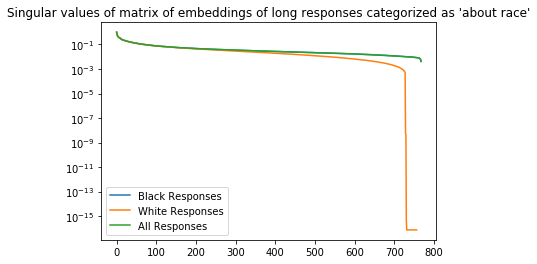

In [97]:
for A in [embed_race_black, embed_race_white, embed_race]:
    U,S,Vt = np.linalg.svd(A, full_matrices=False)
    S = [S[i]/S[0] for i in range(len(S))]
    plt.semilogy(S)
plt.legend(["Black Responses", "White Responses", "All Responses"])
plt.title("Singular values of matrix of embeddings of long responses categorized as 'about race'")

Text(0.5, 1.0, "Singular values of matrix of embeddings of long responses categorized as 'about race'")

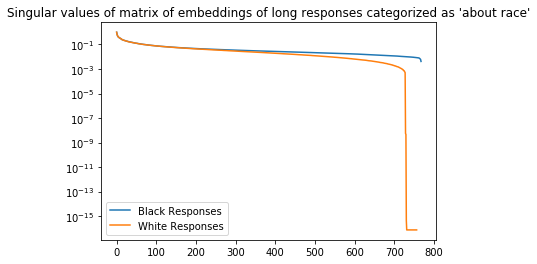

In [106]:
for A in [embed_race_black, embed_race_white]:
    U,S,Vt = np.linalg.svd(A, full_matrices=False)
    S = [S[i]/S[0] for i in range(len(S))]
    plt.semilogy(S)
plt.legend(["Black Responses", "White Responses"])
plt.title("Singular values of matrix of embeddings of long responses categorized as 'about race'")

# CUR Decomposition

In [98]:
def cur(A, idx=False, SVD=None, rank=None):
    
    if SVD==None:
        SVD = np.linalg.svd(A, full_matrices=False)
    if rank==None:
        rank = np.linalg.matrix_rank(A)
    
    V,S,Wt = SVD
    
    def DEIM(M): # row/column selection method
        p = []
        p.append(np.argmax(np.abs(M[:,0]))) # row index of the largest value in the first column of M
        for i in range(1,rank):
            res = M[:,i] - np.dot(M[:,:i],np.dot(np.linalg.inv(M[:,:i][p]), M[:,i][p]))
            p.append(np.argmax(np.abs(res)))
        return p
    
    p_C = DEIM(np.transpose(Wt))
    C = A[:,p_C]
    
    p_R = DEIM(V)
    R = A[p_R]
    
    U = np.linalg.pinv(C) @ A @ np.linalg.pinv(R)
    
    return (C,U,R, p_C, p_R) if idx else (C,U,R)

## Form matrix of "most important" responses

In [99]:
C_race_black, U_race_black, R_race_black, p_C_race_black, p_R_race_black = cur(embed_race_black, idx=True)
C_race_white, U_race_white, R_race_white, p_C_race_white, p_R_race_white = cur(embed_race_white, idx=True)

## Display top 10 responses from each category

In [100]:
print("About race, black\n\n")
for i in range(10):
    print(res_race_black[res_race_black_split_flat[p_C_race_black[i]][0]], '\n')
    
print("\nAbout race, white\n\n")
for i in range(10):
    print(res_race_white[res_race_white_split_flat[p_C_race_white[i]][0]], '\n')

About race, black


in order to make a soldier feel that he has something to fight for. he should be near his home town or near some big city. where he can see and realize what he must fight to try and hold. to stop the ruff treatment of soldiers in southern states would help very much in every negro mind that he really has something to fight for if a man feels that he is being treated right. he can do far better than if he thinks he is not. it is hard to fight another country when we are fighting among our selves. and trying to keep the darker race down because of color. we the negro people are of different color. but of the same material under neath as the white. and if we are giving the chance we can do the same things which have been poorer in some cases. lets stop putting white mp over colored soldiers. and shooting and beating them 

i don't like the comp. here. i don't like the peoples here. i don't like the state here. i don't like the transportation here. i don't like the whit

## Error plots

In [101]:
def plot_eta_c(A):
    V,S,Wt = np.linalg.svd(A, full_matrices=False)
    rank = np.linalg.matrix_rank(A)
    
    eta_c = np.zeros(rank)
    norm = np.zeros(rank)
    sig = np.zeros(rank)
    
    A_k = np.zeros(A.shape)
    for k in range(rank):
        SVD_k = (V[:,:k+1],S[:k+1],Wt[:k+1,:])
        A_k = (SVD_k[0] * SVD_k[1][...,None,:]) @ SVD_k[2]
        C_k, U_k, R_k, p_C_k, p_R_k = cur(A_k, idx=True, SVD=SVD_k, rank=k+1)
        
        WtF_k = SVD_k[2][:k+1,:][:,p_C_k[:k+1]]
        eta_c[k] = np.linalg.norm(np.linalg.inv(WtF_k))
        
        X_k = np.linalg.pinv(C_k) @ A
        norm[k] = np.linalg.norm(A - C_k@X_k)
        
        sig[k] = np.linalg.norm(A - (SVD_k[0] * SVD_k[1][...,None,:]) @ SVD_k[2])
        
        if k%100==0:
            print(k)
        
    plt.scatter(range(rank), eta_c)
    plt.scatter(range(rank), norm)
    plt.scatter(range(1,rank+1), sig)
    
    plt.xlabel('k')
    plt.legend(["(eta_c)_k", "|| A - C_k(X_k) ||", "sigma_k"])

### About race, black responses

0
100
200
300
400
500
600
700


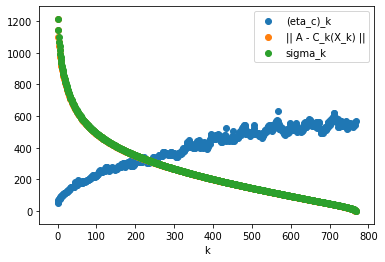

In [102]:
plot_eta_c(embed_race_black)

### About race, white responses

0
100
200
300
400
500
600
700


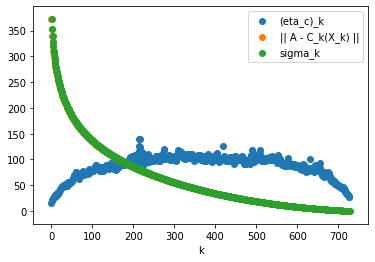

In [103]:
plot_eta_c(embed_race_white)

### About race, all responses

0
100
200
300
400
500
600
700


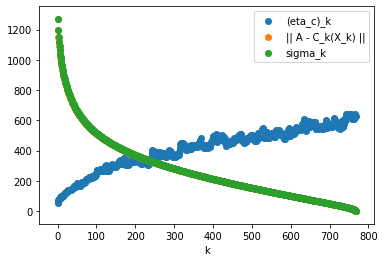

In [104]:
plot_eta_c(embed_race)